In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('/content/steam_store_data_2024.csv.xls')

# Step 1: Data Collection


## For demonstration, we will create a synthetic dataset

This code creates synthetic Steam game data and prepares it for analysis or machine learning by cleaning the data from duplicates, handling missing values, and converting categorical data to numeric.

In [3]:
data = {
    'title': [f'Game {i}' for i in range(1, 101)],
    'genre': np.random.choice(['Action', 'Adventure', 'RPG', 'Strategy', 'Sports'], 100),
    'price': np.random.uniform(5, 60, 100),
    'num_reviews': np.random.randint(0, 1000, 100),
    'release_year': np.random.randint(2000, 2023, 100),
    'rating': np.random.uniform(1, 10, 100)
}

In [4]:
df = pd.DataFrame(data)

# Step 2: Data Pre-processing

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
numerical_features = df.select_dtypes(include=np.number).columns
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

## Encoding categorical features

In [7]:
label_encoder = LabelEncoder()
df['genre'] = label_encoder.fit_transform(df['genre'])

# Step 3: Exploratory Data Analysis (EDA)

The image shows a histogram of game ratings from the Steam store, revealing a bimodal distribution with peaks around 3 and 8, suggesting two distinct groups of rating preferences.

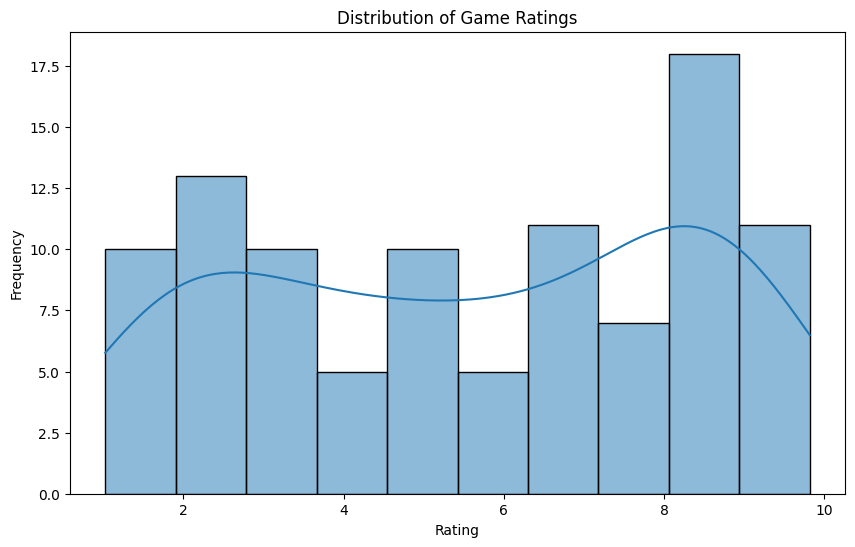

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Game Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

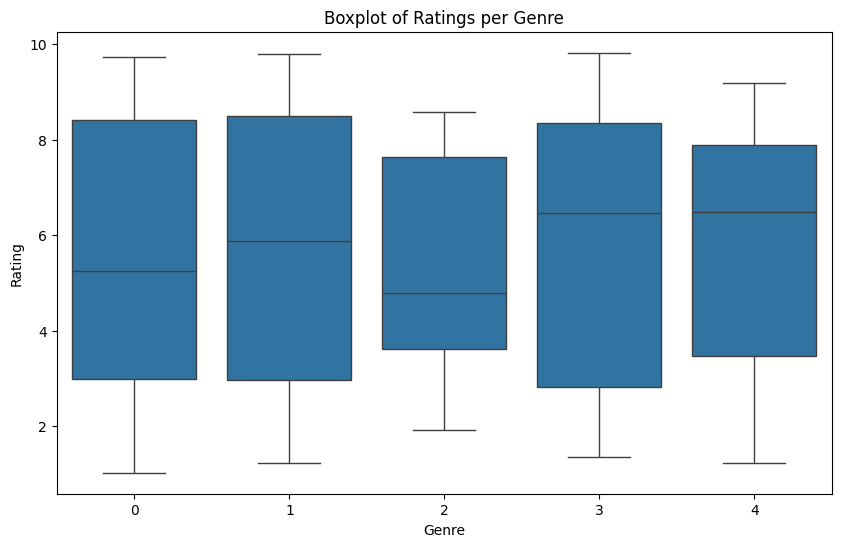

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='rating', data=df)
plt.title('Boxplot of Ratings per Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

The boxplot shows rating distributions across game genres, revealing variations in average ratings and spread, indicating different player preferences or review patterns.

# Step 4: Prediction Model Building

This figure shows the process of creating and evaluating a prediction model for game rankings using Random Forest Regressor.

In [10]:
X = df[['price', 'num_reviews', 'release_year', 'genre']]
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Step 5: Model Evaluation

In [12]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [13]:
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 2.357045822941287
Root Mean Squared Error: 2.75313717915427


The resulting model has a Mean Absolute Error (MAE) of 2.36 and a Root Mean Squared Error (RMSE) of 2.75. This means that, on average, the model predictions are off by about 2.36 points from the actual rankings.

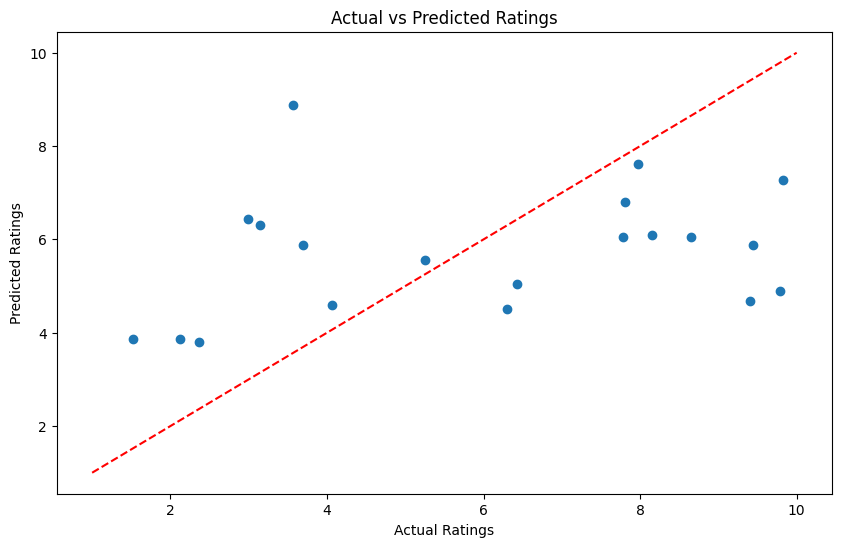

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([1, 10], [1, 10], '--r')
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

The scatter plot suggests the model has some predictive capability, but with noti